# Load the Data

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_health = pd.read_csv('Country_Health.csv')
df_work = pd.read_csv('Access_to_work_in_countries.csv')
df_equity = pd.read_csv('Gender_Equity.csv')

The ```give_an_estimate``` function returns an array of scores for the column. The score is given depending on which part of the range the value is in. For example, take the range of values from 1 to 40. And the variable ```points``` will have a value of 20, that is a score of 1 to 20. In this case, a country that has a value of 1-2 will get 1 point, 3-4 will get 2 points, 5-6 will get 3 points and so on.

The function ```weight``` returns a score for each indicator based on its weight.

In [206]:
def give_an_estimate(array, partitions):
    min_value = min(array)
    max_value = max(array)
    range_value = max_value - min_value
    step = range_value / points

    new_values = []
    for num in array:
        new_value = 1
        for i in range(1, partitions):
            if num >= min_value + i * step:
                new_value += 1
        new_values.append(new_value)

    return new_values

def weight(df,weights):
    points = 20
    i = 0
    for column in df.columns:
        if column == 'Country':
            continue
        else:
            result = assign_new_values(df[column], points)
            df[column] = np.multiply(result, weights[i])
        i += 1

- 'Life expectancy at birth, female (years)' gets weight 20%
- 'Mortality rate, adult, female (per 1,000 female adults)' gets weight 25%
- 'Maternal mortality ratio (modeled estimate, per 100,000 live births)' gets weight 20%
- 'Adolescent fertility rate (births per 1,000 women ages 15-19)'gets weight 10%
-  'Nurses and midwives (per 1,000 people)' gets weight 20%

In [207]:
weight(df_health,[2,-2.5,-2,-1.5,2])

We add a **Result** column that summarizes the scores. 

In [208]:
numeric_columns = df_health.select_dtypes(include='number')
df_health['Result'] = numeric_columns.sum(axis=1)
df_health = df_health.sort_values('Result')

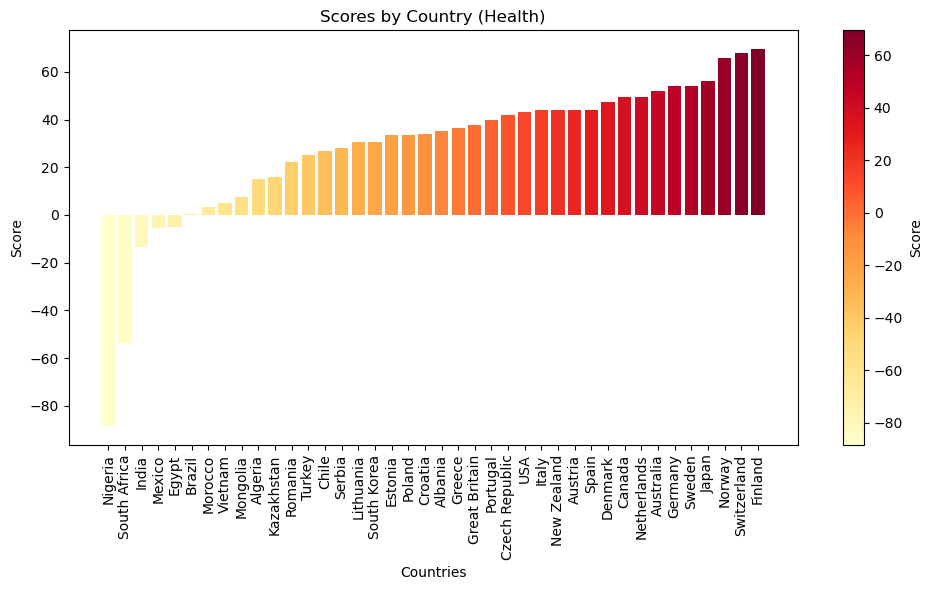

In [209]:
# Create a gradient of colors
colors = plt.cm.get_cmap('YlOrRd')(np.linspace(0, 1, len(df_health['Country'])))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_health['Country'], df_health['Result'], color=colors)

# Customizing the plot
plt.xlabel('Countries')
plt.ylabel('Score')
plt.title('Scores by Country (Health)')

# Rotate country names by 90 degrees
plt.xticks(rotation=90)

# Adding a color gradient legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=min(df_health['Result']), vmax=max(df_health['Result'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Score')

# Display the plot
plt.tight_layout()
plt.show()

## This graph shows the health score for each country

- 'Employment to population ratio, 15+, female (%) (modeled ILO estimate)' gets weight 30%
- 'Length of maternity(weeks)' gets weight 15%
- 'Female share of employment in senior and middle management (%)' gets weight 20%
- 'Unemployment, female (% of female labor force) (modeled ILO estimate)' gets weight 25%
-  'Time required to start a business (days)' gets weight 10%

In [210]:
weight(df_work,[3,1.5,2,-2.5,-1])

In [211]:
numeric_columns = df_work.select_dtypes(include='number')
df_work['Result'] = numeric_columns.sum(axis=1)
df_work = df_work.sort_values('Result')

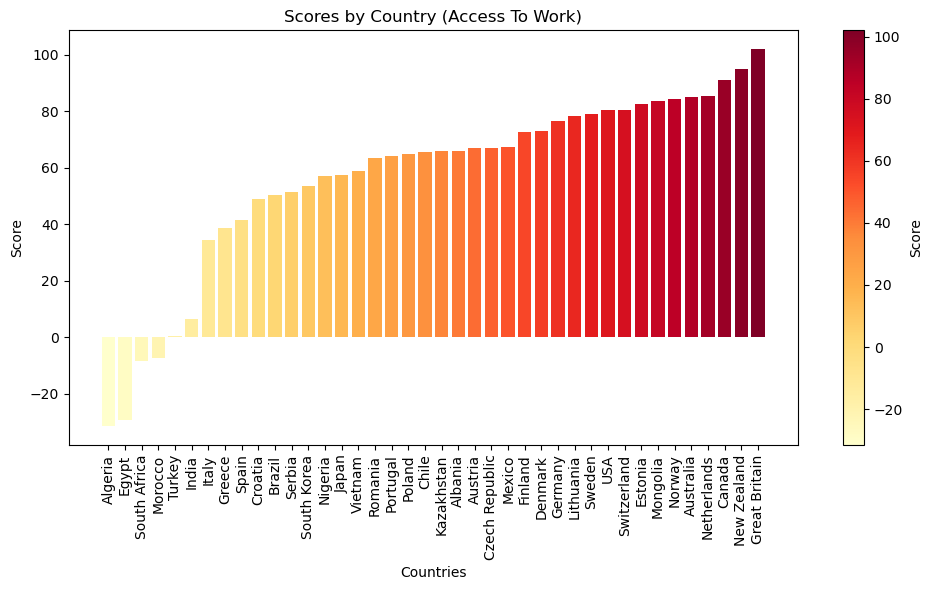

In [212]:
# Create a gradient of colors
colors = plt.cm.get_cmap('YlOrRd')(np.linspace(0, 1, len(df_work['Country'])))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_work['Country'], df_work['Result'], color=colors)

# Customizing the plot
plt.xlabel('Countries')
plt.ylabel('Score')
plt.title('Scores by Country (Access To Work)')

# Rotate country names by 90 degrees
plt.xticks(rotation=90)

# Adding a color gradient legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=min(df_work['Result']), vmax=max(df_work['Result'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Score')

# Display the plot
plt.tight_layout()
plt.show()


## This graph shows the "Access To Work" score for each country

- 'Difference in earnings between men and women in %' gets weight 25%
- 'Rate of women's political participation in the country in %' gets weight 20%
- 'Access to Abortion' gets weight 10%
- 'Female entrepreneurship rate' gets weight 25%
- 'Gender Development Index' gets weight 20%

In [213]:
weight(df_equity,[-2.5,2,1,2.5,2])

In [214]:
numeric_columns = df_equity.select_dtypes(include='number')
df_equity['Result'] = numeric_columns.sum(axis=1)
df_equity = df_equity.sort_values('Result')

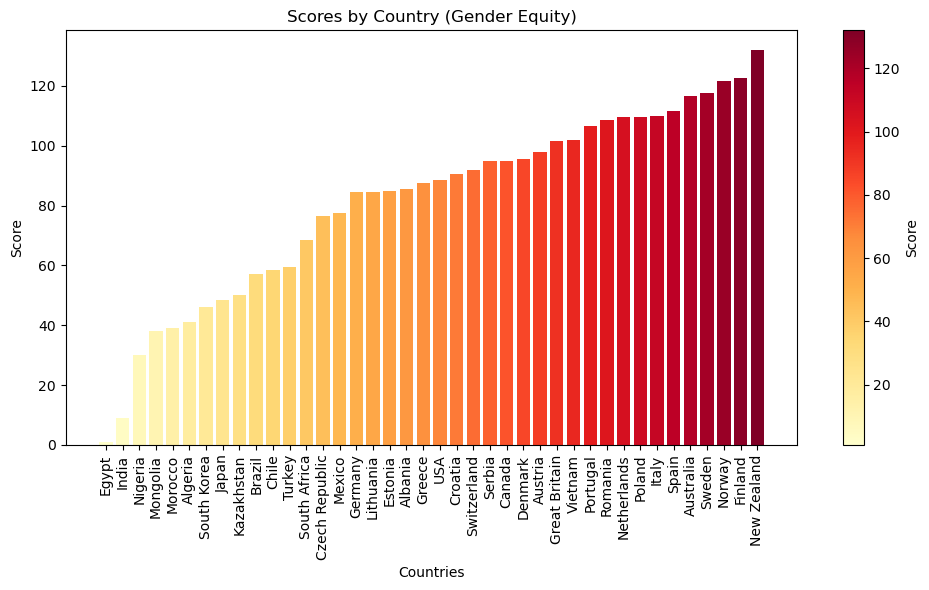

In [215]:
# Create a gradient of colors
colors = plt.cm.get_cmap('YlOrRd')(np.linspace(0, 1, len(df_equity['Country'])))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_equity['Country'], df_equity['Result'], color=colors)

# Customizing the plot
plt.xlabel('Countries')
plt.ylabel('Score')
plt.title('Scores by Country (Gender Equity)')

# Rotate country names by 90 degrees
plt.xticks(rotation=90)

# Adding a color gradient legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=min(df_equity['Result']), vmax=max(df_equity['Result'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Score')

# Display the plot
plt.tight_layout()
plt.show()


## This graph shows the "Gender Equity" score for each country

# To summarize our results.

In [216]:
results = {'Country': df_health['Country'],
        'Health': df_health['Result'],
         'Work': df_work['Result'],
         'Equity': df_equity['Result'],
        }
df1 = pd.DataFrame(results)

In [217]:
weight(df1,[1,1,1])

In [218]:
numeric_columns = df1.select_dtypes(include='number')
df1['Result'] = numeric_columns.sum(axis=1)
df1 = df1.sort_values('Result')

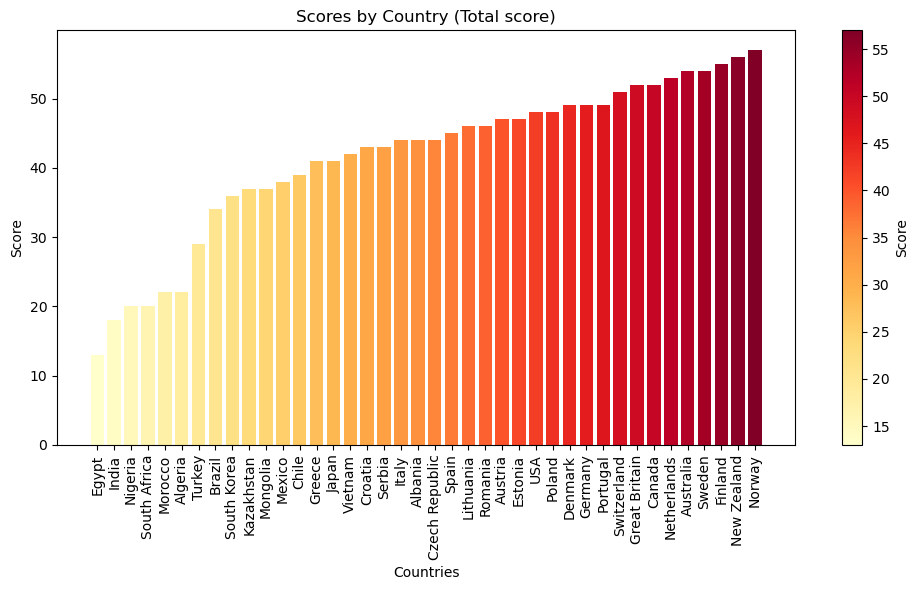

In [219]:
# Create a gradient of colors
colors = plt.cm.get_cmap('YlOrRd')(np.linspace(0, 1, len(df1['Country'])))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df1['Country'], df1['Result'], color=colors)

# Customizing the plot
plt.xlabel('Countries')
plt.ylabel('Score')
plt.title('Scores by Country (Total score)')

# Rotate country names by 90 degrees
plt.xticks(rotation=90)

# Adding a color gradient legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=min(df1['Result']), vmax=max(df1['Result'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Score')

# Display the plot
plt.tight_layout()
plt.show()
